# Цели и задачи

**Цель:** изучить задачу о погоне, а также реализовать её модель программно.

**Задачи:**

* изучить теорию о задаче о погоне
* построить модель для 2 случаев траектории движения

# Программная реализация

## Подготовка к моделированию

Все данные соответствуют варианту 14 = $(1032186063\mod{70}) + 1$.

**Инициализация библиотек**

In [8]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**Начальные данные и необходимые функции**

In [9]:
k=7.5
n=3.1

fi=math.pi/3
x1=k/(n+1)

r0=x1
tetha0=0
tetha=np.arange(tetha0, 2*math.pi, 0.001)

t=np.arange(0,6.284,0.001)
t1=np.arange(r0, k, 0.01)

Объявим необходимые функции, исходя из данной нам информации в теоретической справке.

In [10]:
def dr(r,tetha):
    dr = r/math.sqrt(n*n-1)
    return dr

def f2(t):
    xt=math.tan(fi+math.pi)*t
    return xt

def f3(t1):
    xt=math.tan(tetha0)*t1
    return xt

def cart2pol(x,y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

Заложим в переменные решения для наших СДУ с помощью функции `odeint` модуля `scipy.integrate`, а также найдём точку пересечения траекторий.

## Построение графиков

### Модель первого типа

crosspoint: r=1.048, tetha=2.6145016420772618


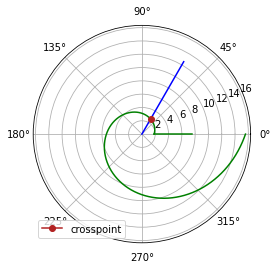

In [11]:
r=odeint(dr,r0,tetha)
r1, tetha1 = cart2pol(t, f2(t))
r2, tetha2 = cart2pol(t1, f3(t1))

for i in range(len(tetha)):
    if abs(tetha1[i]-tetha[i]) <= 0.001:
        r_ins = tetha[i]
        tetha_ins = r[i][0]

plt.polar(tetha,r,'g')
plt.polar(tetha2, r2, 'g')
plt.polar(tetha1,r1,'b')
plt.polar(r_ins, tetha_ins, color='firebrick', marker='o', label='crosspoint')
plt.legend(loc='lower left')

print('crosspoint: r='+str(r_ins)+', tetha='+ str(tetha_ins))

### Модель второго типа

In [12]:
x2 = k/(n-1)
r0 = x2

tetha0 = -math.pi
tetha = np.arange(tetha0, -tetha0, 0.001)
r=odeint(dr,r0,tetha)

In [13]:
t1=np.arange(-k, -r0, 0.01)
t=np.arange(0,10,0.001)

crosspoint: r=1.047407346409745, tetha=14.888261569723666


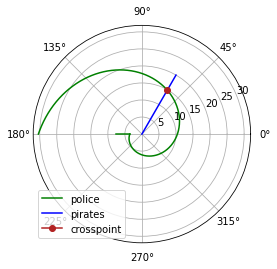

In [14]:
r1, tetha1 = cart2pol(t, f2(t))
r2, tetha2 = cart2pol(t1, f3(t1))

for i in range(len(tetha)):
    if abs(tetha1[i]-tetha[i]) <= 0.001:
        r_ins = tetha[i]
        tetha_ins = r[i][0]

plt.polar(tetha,r,'g', label='police')
plt.polar(tetha2, r2, 'g')
plt.polar(tetha1,r1,'b', label='pirates')
plt.polar(r_ins, tetha_ins, color='firebrick', marker='o', label='crosspoint')
plt.legend(loc='lower left')

print('crosspoint: r='+str(r_ins)+', tetha='+ str(tetha_ins))

# Выводы

Мы изучили теорию о задаче о погоне, а также успешно реализовали 2 модели для решения этой задачи.